In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import thinkstats2 as ts
import thinkplot as tp
import nsfg
import matplotlib.pyplot as plt, mpld3
import mpld3
%matplotlib inline
mpld3.enable_notebook()

mpld3 is the package I use to imporve the plotting in jupyter notebook. It should be installed in the environment.(Using pip install mlpd3 or install it in anaconda) If it is unnecessary for you, just skip importing it.

In [2]:
df1 = pd.read_csv('Game.csv')
df1 = df1.dropna()
df1.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


### First I need to clean the data and take a brief view of what the dataframe provied.
### After viewing the data there are several question came to my head.
### 1.Is there any difference between the scoring patterns between critics and users?
### 2.Which factor effects the global sales of a game, the critc score, the user score or something else?

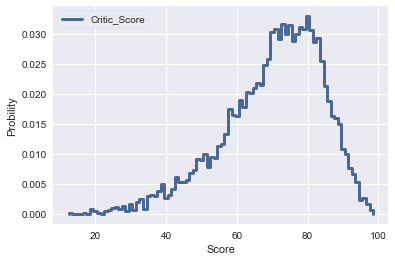

In [3]:
pmf_CriticScore = ts.Pmf(df1["Critic_Score"], label='Critic_Score')
tp.pmf(pmf_CriticScore)
tp.Config(xlabel='Score', ylabel='Probility', loc='upper left')

### Using the PMF we can see the scoring pattern of the critics.

In [4]:
df1["User_Score"] = df1["User_Score"].astype(float)*10
df1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E


Since the unit between the critic score and the user score is not the same, we should unite them

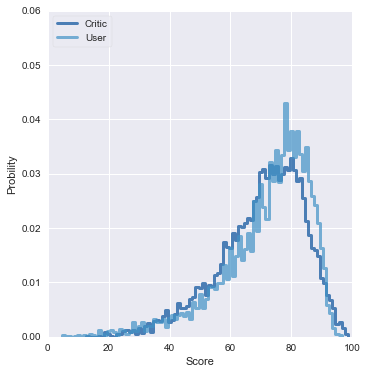

In [5]:
Critic_pmf = ts.Pmf(df1["Critic_Score"], label='Critic')
User_pmf = ts.Pmf(df1["User_Score"], label='User')
axis = [0, 100, 0, 0.06]
tp.PrePlot(2, cols =2)
tp.Pmfs([Critic_pmf, User_pmf])
tp.Config(xlabel='Score', ylabel='Probility',axis=axis)

### Ploting the PMFs of the critics score and the users score, we can see the differnces between their scoring pattern. But it is not clearly enough.

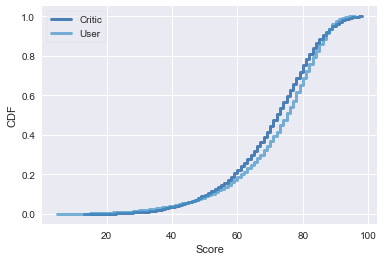

In [6]:
Critic_cdf = ts.Cdf(df1["Critic_Score"], label='Critic')
User_cdf = ts.Cdf(df1["User_Score"], label='User')

tp.PrePlot(2)
tp.Cdfs([Critic_cdf, User_cdf])
tp.Config(xlabel='Score', ylabel='CDF')

### Using the CDFs we can clearly see that the critics tend to give lower scores in most games(60,85), but when it comes to good games(>85), the critics tend to give higher scores.

In [7]:
mu, var = ts.TrimmedMeanVar(df1["Critic_Score"], p=0.01)
print('Mean, Var', mu, var)

Mean, Var 70.4671849305 169.494849319


Sigma 13.0190187541


{'xscale': 'linear', 'yscale': 'linear'}

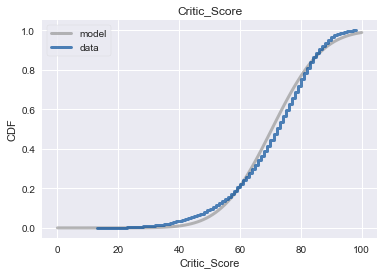

In [8]:
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = ts.RenderNormalCdf(mu, sigma, low=0, high=100)

tp.Plot(xs, ps, label='model', color='0.6')

normal_cdf = ts.Cdf(df1["Critic_Score"], label='data')

tp.PrePlot(1)
tp.Cdf(normal_cdf) 
tp.Config(title='Critic_Score',
                 xlabel='Critic_Score',
                 ylabel='CDF')

### Then I use the critic score to see if it fits the normal distruibution.

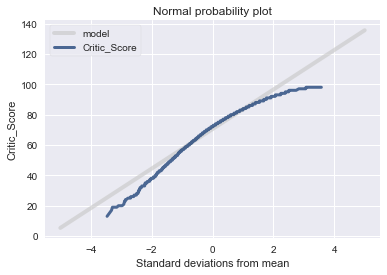

In [9]:

xs = [-5, 5]
fxs, fys = ts.FitLine(xs, mu, sigma)
tp.Plot(fxs, fys, linewidth=4, color='0.8', label='model')

xs, ys = ts.NormalProbability(df1["Critic_Score"])
tp.Plot(xs, ys, label='Critic_Score')

tp.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Critic_Score')

### It turns out that it mainly fits the normal distribution in (57, 74). In other region, it doesn't fit normal distribution.

In [10]:
def MakeNormalModel(log_score):
    cdf = ts.Cdf(log_score, label='Critic_Score')

    mean, var = ts.TrimmedMeanVar(log_score)
    std = np.sqrt(var)
    print('n, mean, std', len(df1["Critic_Score"]), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = ts.RenderNormalCdf(mean, std, xmin, xmax)
    tp.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    tp.Cdf(cdf)

n, mean, std 6825 1.83949327662 0.0892772730554


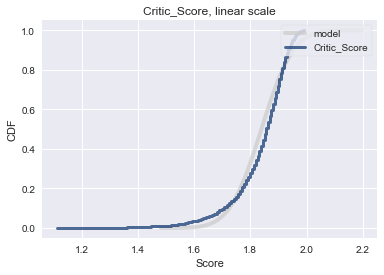

In [11]:
log_score = np.log10(df1["Critic_Score"])
MakeNormalModel(log_score)
tp.Config(title='Critic_Score, linear scale', xlabel='Score',
                 ylabel='CDF', loc='upper right')

### I try to use the log-normal mode to fits the data, but the situation is worse.

In [12]:
def MakeNormalPlot(log_score):
    mean, var = ts.TrimmedMeanVar(log_score, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = ts.FitLine(xs, mean, std)
    tp.Plot(xs, ys, color='0.8', label='model')

    xs, ys = ts.NormalProbability(log_score)
    tp.Plot(xs, ys, label='score')

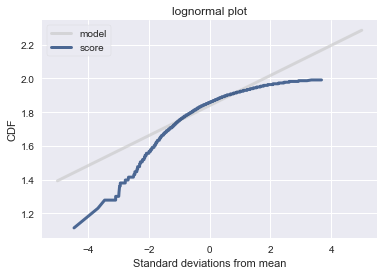

In [13]:
MakeNormalPlot(log_score)
tp.Config(title='lognormal plot', xlabel='Standard deviations from mean',
                 ylabel='CDF', loc='upper left')

### Using Log-noraml mode just amplify the deviation.



### Then  I step into finding which factor effects the global sales of a game, again, I need to clean the data first.

In [14]:
df1[df1["Global_Sales"]>20].head(5)
len(df1[df1["Global_Sales"]>20])
len(df1[df1["Global_Sales"]>20])/len(df1["Global_Sales"])

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E


13

0.0019047619047619048

### Extracting 0.1% outliers.

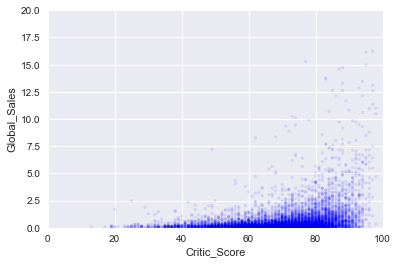

In [15]:
tp.Scatter(df1["Critic_Score"], df1["Global_Sales"], alpha=0.1, s=10)
tp.Config(xlabel='Critic_Score',
                 ylabel='Global_Sales',
                 axis=[0, 100, 0, 20],
                 legend=False)

### First I decide to use critic socre to see if it affect the global sales, and plotting the scatter plot. It seems that there exist some correlation.

In [16]:
ts.Cov(df1["Critic_Score"], df1["Global_Sales"])
ts.Corr(df1["Critic_Score"], df1["Global_Sales"])
ts.SpearmanCorr(df1["Critic_Score"], df1["Global_Sales"])

6.467729794308255

0.23755572228274235

0.38212626016147233

### The pearson's correlation is 0.24, and the spearman's correlation is higher, 0.38. 

In [17]:
df1.corr().loc["Global_Sales"]

Year_of_Release    0.006661
NA_Sales           0.955793
EU_Sales           0.939313
JP_Sales           0.613546
Other_Sales        0.804028
Global_Sales       1.000000
Critic_Score       0.237556
Critic_Count       0.290397
User_Score         0.088349
User_Count         0.264151
Name: Global_Sales, dtype: float64

### Then I plot all the pearson's correlation, which using all the variable in the data as independent variables and using global sales as dependent variables. Since NA, EU and JP sales are part of the global sales, we should ignore them. It turns out there exists stronger correlation when using Critic counts and User counts as independent variables than using critic scores. Interesting, but it just explain the correlation, but not the causation.

In [18]:
class DiffMeansPermute(ts.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
class CorrelationPermute(ts.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(ts.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

### Then I do some hypothesis test in order to see the probability of seeing the previous results by chance.

In [19]:
data = df1["Critic_Score"], df1["User_Score"]
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print ("%.10f" %pvalue)
ht.actual, ht.MaxTestStat()

0.0000000000


(1.58417582417583, 0.84161172161172715)

### First I carry on the hypothesis test in the different scoring pattern of critics and users. The previous reslut shows that the critics tend to give lower scores. By using Downey's method, it is clearly that the critics will rank 1.6 point lower than the users. The P value is very close to zero. So it is statistically significant.

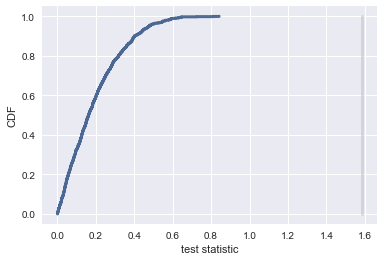

In [20]:
ht.PlotCdf()
tp.Config(xlabel='test statistic',
                   ylabel='CDF')

In [21]:
data = df1["Critic_Score"], df1["Global_Sales"]
ht = CorrelationPermute(data)
pvalue = ht.PValue()
print ("%.10f" %pvalue)
ht.actual, ht.MaxTestStat()

0.0000000000


(0.23755572228274235, 0.045959377737908223)

### The second hypothesis test is about  the correlation between the critic score and the global sales, it turns out that the correlation is also statistically significant.

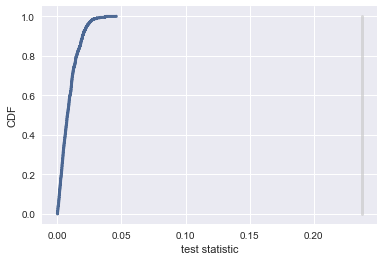

In [22]:
ht.PlotCdf()
tp.Config(xlabel='test statistic',
                   ylabel='CDF')

### Then I started to look at the regressions in the data.

In [23]:
def LeastSquares(xs, ys):
    meanx, varx = ts.MeanVar(xs)
    meany = ts.Mean(ys)

    slope = ts.Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [24]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [25]:
inter, slope = LeastSquares(df1["Critic_Score"], df1["Global_Sales"])
inter, slope

(-1.585797289713208, 0.033631945535183491)

In [26]:
fit_xs, fit_ys = FitLine(df1["Critic_Score"], inter, slope)

Y = 0.034*X  -1.586


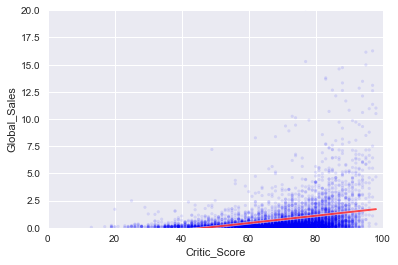

In [27]:
tp.Scatter(df1["Critic_Score"], df1["Global_Sales"], alpha=0.1, s=10)
tp.Plot(fit_xs, fit_ys, color='white', linewidth=3)
tp.Plot(fit_xs, fit_ys, color='red', linewidth=2)
tp.Config(xlabel='Critic_Score',
                 ylabel='Global_Sales',
                 axis=[0, 100, 0, 20],
                 legend=False)
print('Y = {}*X  {}'.format(round(slope, 3), round(inter, 3)))

### Using the Linear least squares to see the simple linear regression between the critic score and the global sales and drawing the fitline. But seeing the fitline does not reveal the goodness of fit. So I use the statsmodel to see the goodness of fit.

In [28]:
import statsmodels.formula.api as smf
from __future__ import print_function, division


In [29]:
formula = 'Global_Sales ~ Critic_Score'
model = smf.ols(formula, data=df1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     408.1
Date:                Tue, 19 Dec 2017   Prob (F-statistic):           3.51e-88
Time:                        11:41:54   Log-Likelihood:                -14090.
No. Observations:                6825   AIC:                         2.818e+04
Df Residuals:                    6823   BIC:                         2.820e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.5858      0.119    -13.298      0.000      -1.820      -1.352
Critic_Score     0.0336      0.002     20.201      0.000       0.030       0.037
==============================================================================
Omnibus:                    14044.679   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         87895668.080
Skew:                          16.983   Prob(JB):                         0.00
Kurtosis:                     557.914   Cond. No.                         370.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### It turns out that the coecient of determination(R-squared) is merely 0.056. The quality of this simple linear model (Global_Sales ~ Critic_Score) is not good. 
### So I decide to bulit some multiple regression models in order to see if adding the other correlated factors (Critic_Count, User_Count), the goodness of fit of the multiple regression model will imporve.

In [30]:
df1.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E


In [31]:
formula = 'Global_Sales ~ Critic_Score + Critic_Count + User_Count'
model = smf.ols(formula, data=df1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     325.8
Date:                Tue, 19 Dec 2017   Prob (F-statistic):          1.00e-197
Time:                        11:41:54   Log-Likelihood:                -13832.
No. Observations:                6825   AIC:                         2.767e+04
Df Residuals:                    6821   BIC:                         2.770e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0654      0.117     -9.069      0.000      -1.296      -0.835
Critic_Score     0.0172      0.002      9.757      0.000       0.014       0.021
Critic_Count     0.0186      0.001     14.081      0.000       0.016       0.021
User_Count       0.0006   4.11e-05     13.461      0.000       0.000       0.001
==============================================================================
Omnibus:                    14440.135   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        111888013.928
Skew:                          18.064   Prob(JB):                         0.00
Kurtosis:                     629.217   Cond. No.                     3.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The R-squared is 0.125. Twice than the simple linear regression model. 

### Then I started to wonder if the genre will affect the coecient of determination if we divide the data by using different genres and build the the same regression model.

In [32]:
df1.Genre.value_counts()

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

In [33]:
Genre = ["Action", "Sports","Shooter", "Role-Playing","Racing","Platform","Misc","Fighting","Simulation","Strategy","Adventure","Puzzle"]

In [34]:
for i in range(0, 12):
    df2 = df1[df1.Genre == Genre[i]]
    formula = 'Global_Sales ~ Critic_Score + Critic_Count + User_Count'
    model = smf.ols(formula, data= df2)
    results = model.fit()
    R2 = results.rsquared
    print ("The R-squared of", Genre[i],"is", R2)

The R-squared of Action is 0.303355252327
The R-squared of Sports is 0.0820093824146
The R-squared of Shooter is 0.278324780537
The R-squared of Role-Playing is 0.271014268735
The R-squared of Racing is 0.19500483734
The R-squared of Platform is 0.20682115654
The R-squared of Misc is 0.0882780927658
The R-squared of Fighting is 0.462083293075
The R-squared of Simulation is 0.14526293287
The R-squared of Strategy is 0.212148161839
The R-squared of Adventure is 0.323531504161
The R-squared of Puzzle is 0.105781216676


### Interesting, it turns out that if we use the subdata divided by genres, the goodness of fit of the same regression rise dramaticaly. Why? It is by chance or there exists some deeper relationship between these data. I guess it may related to the individual scoring pattern and sales pattern.

### In order to see if the situation will  happen again or not when we divide the data in other ways, I divide the data by platform, using the same methods as genre to build regression models. 

In [35]:
df1.Platform.value_counts()

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

In [36]:
Platform = ["PS2","X360","PS3","PC","XB","Wii","DS","PSP","GC","PS4","GBA","XOne","3DS","PS","PSV","WiiU","DC"]

In [37]:
for i in range(0, len(Platform)):
    df3 = df1[df1.Platform == Platform[i]]
    formula = 'Global_Sales ~ Critic_Score + Critic_Count + User_Count'
    model = smf.ols(formula, data= df3)
    results = model.fit()
    R2 = results.rsquared
    print ("The R-squared of", Platform[i],"is", R2)

The R-squared of PS2 is 0.442972887919
The R-squared of X360 is 0.540773079822
The R-squared of PS3 is 0.491784551542
The R-squared of PC is 0.202830835918
The R-squared of XB is 0.679658116496
The R-squared of Wii is 0.117336269463
The R-squared of DS is 0.313422076655
The R-squared of PSP is 0.374379593685
The R-squared of GC is 0.51442926864
The R-squared of PS4 is 0.404262605741
The R-squared of GBA is 0.246189279453
The R-squared of XOne is 0.422124126068
The R-squared of 3DS is 0.480667285146
The R-squared of PS is 0.554813720959
The R-squared of PSV is 0.654422712323
The R-squared of WiiU is 0.499384298759
The R-squared of DC is 0.16199405484


### It is more interesting that when you divide the data by platform. The goodness of fit of the same regression rises even more. Is there really some inner pattern in different genres of games or in games in different platforms?

In [38]:
df4 = df1
df4.Year_of_Release = df4.Year_of_Release.astype(int)
df4.Year_of_Release = df4.Year_of_Release.astype(str)


In [39]:
df4.Year_of_Release = pd.to_datetime(df4.Year_of_Release)
df4 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006-01-01,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E
7,Wii Play,Wii,2006-01-01,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,84.0,594.0,Nintendo,E
11,Mario Kart DS,DS,2005-01-01,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,86.0,464.0,Nintendo,E
13,Wii Fit,Wii,2007-01-01,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,77.0,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010-01-01,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,63.0,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009-01-01,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,74.0,52.0,Nintendo,E


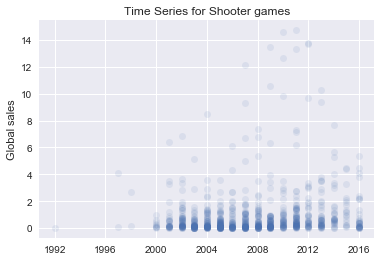

In [40]:
df_shooter = df4[df4.Genre == "Shooter"]
x = df_shooter.Year_of_Release
y = df_shooter.Global_Sales
fig = plt.plot_date(x=x, y=y, alpha=0.1)
plt.title("Time Series for Shooter games")
plt.ylabel("Global sales")

### Ploting the time series scatter plot of the shooter games and global sales.